# Visualization

TODO: 
- add seaborn
http://seaborn.pydata.org/index.html
- Vispy

### Standard plots with Matplotlib: line, scatter, chart, contour, heatmap

Control every detail of your graphics programmatically.

Have a look at more examples:
http://matplotlib.org/gallery.html


/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


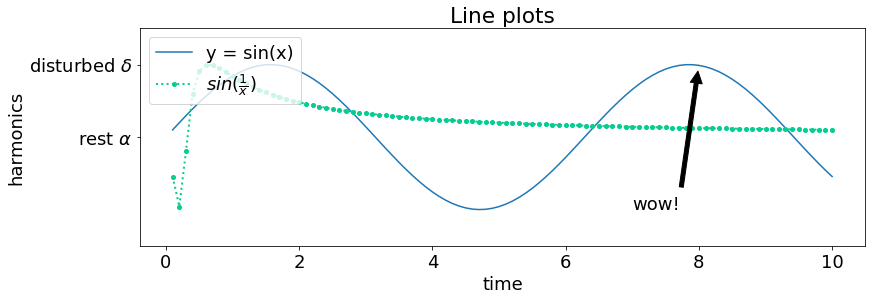

In [2]:
#ipython magic command
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'arial'})

x = np.linspace(0.1, 10, 100)
y1 = np.sin(x)
y2 = np.sin(1/x)
#y2 = np.exp(x)

fig, ax = plt.subplots(figsize=(13,4))

#axes[0].plot(x, y1, x, y2)
ax.plot(x, y1, label="y = sin(x)")
ax.plot(x, y2, label=r"$sin(\frac{1}{x})$", color="#05cd90", lw=2, ls='dotted', marker='o', markersize=4)
ax.set_xlabel('time')
ax.set_ylabel('harmonics')
ax.set_ylim([- 1.5, 1.5])
#ax.set_yscale("log")
ax.set_title("Line plots")
ax.legend(loc=2)
yticks = [0, 1]
plt.annotate('wow!', xy=(8, 1), xytext=(7, -1), arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_yticks(yticks)
ax.set_yticklabels([r"rest $\alpha$", r"disturbed $\delta$"], fontsize=18)

#fig.savefig("filename.png")
#fig.savefig("filename.png", dpi=100)
plt.show()


/home/sergiun/programs/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


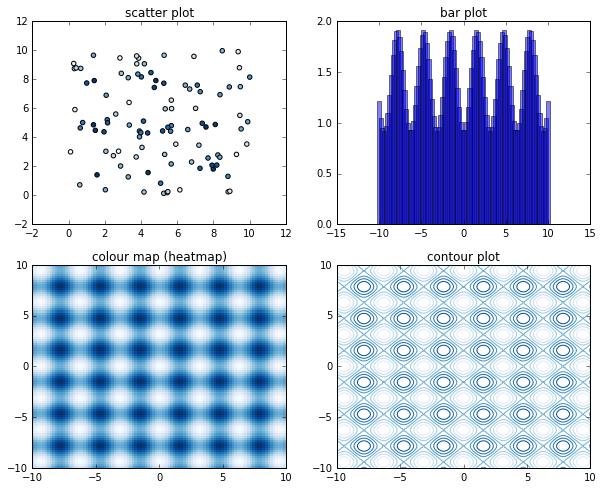

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(10,8))
matplotlib.rcParams.update({'font.size': 10, 'font.family': 'arial'})
x = 10*np.random.random(100)
y = 10*np.random.random(100)
def f(x,y): return np.sin(x)**2+np.sin(y)**2

axes[0][0].scatter(x, y, c=f(x,y), cmap=plt.cm.Blues)
axes[0][0].set_title("scatter plot")

x1 = np.linspace(-10,10,100)
y1 = np.zeros(100)+5.0
axes[0][1].bar(x1, f(x1,y1), align="center", width=0.5, alpha=0.5)
axes[0][1].set_title("bar plot")


x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x, y)
Z = f(X,Y)
axes[1][0].pcolor(x, y, Z, cmap=plt.cm.Blues, vmin=np.abs(Z).min(), vmax=np.abs(Z).max())
#axes[1][1].pcolor(x, y, Z, cmap=plt.cm.RdBu, vmin=np.abs(Z).min(), vmax=np.abs(Z).max())
axes[1][0].set_title("colour map (heatmap)")

axes[1][1].contour(Z.T, cmap=plt.cm.Blues, vmin=np.abs(Z).min(), vmax=np.abs(Z).max(), extent=[-10, 10, -10, 10])
axes[1][1].set_title("contour plot")


### Web publishing with plotly and Bokeh

[Bokeh](http://bokeh.pydata.org/en/latest/)

[plotly](http://bokeh.pydata.org/en/latest/)

http://nbviewer.ipython.org/gist/fonnesbeck/ad091b81bffda28fd657/Creating%20Interactive%20Visualizations%20with%20Bokeh.ipynb

jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [1]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [3]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [4]:
show(p, notebook_handle=True)

In [5]:
from IPython.display import display
from ipywidgets import *
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

<function __main__.update(f, w=1, A=1, phi=0)>

In [6]:
from IPython.display import display
from ipywidgets import *
w = IntSlider()
display(w)

IntSlider(value=0)

In [8]:
def f(x):
    return x
interact(f, x=10);

10

## Warning: garbled mess below!!

In [ ]:
! pip install plotly --upgrade

In [5]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode() # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook
from plotly.graph_objs import *
import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)


In [6]:
from plotly.graph_objs import *
import numpy as np

data = Data([
    Heatmap(
        z=[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56], [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57], [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73], [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74], [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75], [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76], [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77], [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81], [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83], [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85], [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86], [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87], [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90], [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91], [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92], [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93], [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94], [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], [47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97], [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]],
        colorscale='Jet'
    )
])
layout = Layout(
    title='Heatmap with Jet color scale'
)
fig = Figure(data=data, layout=layout)
iplot(fig)
#plot_url = py.plot(fig, filename='Jet-heatmap')

In [7]:
import plotly
print(plotly.__version__)            # version 1.9.4 required
plotly.offline.init_notebook_mode() # run at the start of every notebook
plotly.offline.iplot({
"data": [{
    "x": [1, 2, 3],
    "y": [4, 2, 5]
}],
"layout": {
    "title": "hello world"
}
})

1.9.9


### Network layout and display

/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/sergiu/programs/miniconda3/envs/pycourse/lib/python3.5/site-packages/matplotlib/rcsetup.p

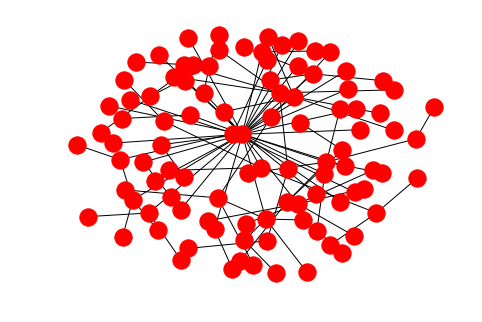

In [6]:
#http://www.python-course.eu/networkx.php
%matplotlib inline
import networkx as nx
#net = nx.erdos_renyi_graph(100,0.12)
net = nx.barabasi_albert_graph(100, 1)
nx.write_gml(net,"mynetwork.gml")

import matplotlib.pyplot as plt
#nx.draw(net)
nx.draw(net,pos=nx.spring_layout(net, scale = 5000, iterations = 10))
#nx.draw_random(net)
#nx.draw_circular(net)
#nx.draw_spectral(net, dim = 500, scale = 20)

#plt.show()

## Generate a picture and load it with IPython
#plt.savefig("test.png")

#from IPython.display import Image
#Image(filename='test.png')

#from IPython.core.display import HTML 
#HTML('<img src="files/test.png" width=100 height=20/>') 





Example of network interactivity in IPython:

http://nbviewer.ipython.org/github/kzuberi/ipython-cytoscape.js/blob/master/demo.ipynb

In [ ]:

import pandas as pd
nodes = pd.DataFrame([['ipcy', 'IPython-Cytoscape.js', 50, 'green', 'square'], 
                      ['cy', 'Cytoscape.js', 50, 'blue', 'circle'],
                      ['ip', 'IPython', 50, 'red', 'hexagon']],                      
                     columns=['id', 'name', 'weight', 'color', 'shape'])
edges = pd.DataFrame([['ipcy', 'ip', 20, 'gray' ], 
                      ['ipcy', 'cy', 20, 'gray']], 
                     columns=['source', 'target', 'strength', 'color'])
%load_ext cyto
network = cyto.Network(nodes, edges)
network
#network.save_state()

#nw2 = cyto.Network(nodes, edges, layout='grid')
#nw2

### Basic GUI programming with wxPython

In [18]:
%gui wx

"""
A Simple wx example to test IPython's event loop integration.

To run this do:

In [5]: %gui wx  # or start IPython with '--gui wx'

In [6]: %run gui-wx.py

Ref: Modified from wxPython source code wxPython/samples/simple/simple.py
"""


import wx


class MyFrame(wx.Frame):
    """
    This is MyFrame.  It just shows a few controls on a wxPanel,
    and has a simple menu.
    """
    def __init__(self, parent, title):
        wx.Frame.__init__(self, parent, -1, title,
                          pos=(150, 150), size=(350, 200))

        # Create the menubar
        menuBar = wx.MenuBar()

        # and a menu
        menu = wx.Menu()

        # add an item to the menu, using \tKeyName automatically
        # creates an accelerator, the third param is some help text
        # that will show up in the statusbar
        menu.Append(wx.ID_EXIT, "E&xit\tAlt-X", "Exit this simple sample")

        # bind the menu event to an event handler
        self.Bind(wx.EVT_MENU, self.OnTimeToClose, id=wx.ID_EXIT)

        # and put the menu on the menubar
        menuBar.Append(menu, "&File")
        self.SetMenuBar(menuBar)

        self.CreateStatusBar()

        # Now create the Panel to put the other controls on.
        panel = wx.Panel(self)

        # and a few controls
        text = wx.StaticText(panel, -1, "Hello World!")
        text.SetFont(wx.Font(14, wx.SWISS, wx.NORMAL, wx.BOLD))
        text.SetSize(text.GetBestSize())
        btn = wx.Button(panel, -1, "Close")
        funbtn = wx.Button(panel, -1, "Just for fun...")

        # bind the button events to handlers
        self.Bind(wx.EVT_BUTTON, self.OnTimeToClose, btn)
        self.Bind(wx.EVT_BUTTON, self.OnFunButton, funbtn)

        # Use a sizer to layout the controls, stacked vertically and with
        # a 10 pixel border around each
        sizer = wx.BoxSizer(wx.VERTICAL)
        sizer.Add(text, 0, wx.ALL, 10)
        sizer.Add(btn, 0, wx.ALL, 10)
        sizer.Add(funbtn, 0, wx.ALL, 10)
        panel.SetSizer(sizer)
        panel.Layout()


    def OnTimeToClose(self, evt):
        """Event handler for the button click."""
        print("See ya later!")
        self.Close()

    def OnFunButton(self, evt):
        """Event handler for the button click."""
        print("Having fun yet?")


class MyApp(wx.App):
    def OnInit(self):
        frame = MyFrame(None, "Simple wxPython App")
        self.SetTopWindow(frame)

        print("Print statements go to this stdout window by default.")

        frame.Show(True)
        return True

app = None
app = wx.GetApp()
if app is None:
    app = MyApp(redirect=False, clearSigInt=False)
else:
    frame = MyFrame(None, "Simple wxPython App")
    app.SetTopWindow(frame)
    print("Print statements go to this stdout window by default.")
    frame.Show(True)

try:
    from IPython.lib.inputhook import enable_wx
    enable_wx(app)
except ImportError:
    print("error")
    app.MainLoop()

ImportError: No module named 'wx'

In [10]:
from ipywidgets import widgets 

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

In [15]:
from ipywidgets import *
IntSlider()

In [14]:
widgets.Select(
    description='OS:',
    options=['Linux', 'Windows', 'OSX'],
)

In [17]:
import ipywidgets as widgets
from IPython.display import display
name = widgets.Text(description='Name:', padding=4)
#name.layout.padding = 4
color = widgets.Dropdown(description='Color:', options=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])
#color.layout.padding = 4
page1 = widgets.Box(children=[name, color])
#page1.layout.padding = 4

age = widgets.IntSlider(description='Age:', min=0, max=120, value=50)
#age.layout.padding = 4
gender = widgets.RadioButtons(description='Gender:', options=['male', 'female'])
#gender.layout.padding = 4
page2 = widgets.Box(children=[age, gender])
#page2.layout.padding = 4

tabs = widgets.Tab(children=[page1, page2])
display(tabs)

tabs.set_title(0, 'Name')
tabs.set_title(1, 'Details')

In [7]:
from ipywidgets import interact
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 1.0, 0.001),
        generator={'lobster': random_lobster,
                   'power law': powerlaw_cluster,
                   'Newman-Watts-Strogatz': newman_watts_strogatz,
                   u'Erdős-Rényi': erdos_renyi,
                   });